<a href="https://colab.research.google.com/github/pavlyuchenkomaria/-Python/blob/master/laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.log10(1+2*x) + x - 2

X = np.linspace(1.25, 1.6, 100)

In [106]:
from sympy import Symbol, solve, log
x = Symbol('x')
solve(log(1+2*x) + x - 2, x)


[-1/2 + LambertW(exp(5/2)/2)]

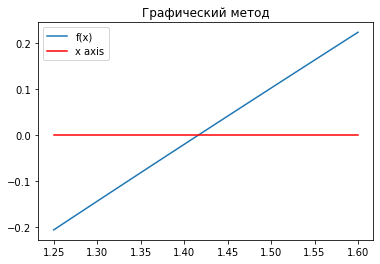

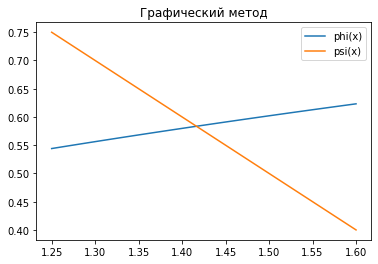

In [62]:
plt.plot(X, f(X))
plt.plot(X, np.repeat(0, X.shape), c='r')
plt.legend(['f(x)', 'x axis'])
plt.title("Графический метод")
plt.show()
def phi(x):
  return np.log10(1+2*x)
def psi(x):
  return  (2-x)

plt.plot(X, phi(X))
plt.plot(X, psi(X))
plt.legend(['phi(x)', 'psi(x)'])
plt.title("Графический метод");

Метод простой итерации


In [98]:
def Fi0(x):
  return 2-np.log10(1+2*x)
a = 1.25
b = 1.5
check=0
def easy_iteration_method_0(a,b,Fi0,check,eps=0.00001):
  for i in np.arange(a,b):
    if abs(Fi0(i))<1:
      check=1
      return check
  if check==0:
    lam = 1/f(a)    
  return f(a)
lam = easy_iteration_method_0(1.25,1.5,Fi0,0,0.00001)
print(lam) 

def Fi(x):
  return x-lam*f(x)

# если в выводе 1, используем Fi0, иначе - Fi

-0.20593195564972433


In [0]:
def easy_iteration_method(a,b,Fi,eps,N=0):
  x0 = a
  x1 = a+2*eps
  while (abs(x1-x0))>=eps:
    temp=x1
    x1=Fi(x0)
    x0=temp
    N=N+1
  return x1,N


In [100]:
easy_iteration_method(1.25,1.5,Fi,0.00001,0)
# (nan, 23)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(nan, 23)

Метод Ньютона

In [81]:
import scipy
from scipy import misc
def f(x):
   return np.log10(1+2*x) + x - 2
def f1(x):
   return 1+2/((2*x+1)*ln(10))

x0=1.25
print('f(x0): ', f(x0))
print('f1(x0): ', f1(x0))
print('f2(x0): ', misc.derivative(f1, x0))
print('checking...', 1 if f(x0)*misc.derivative(f1, x0) > 0 else -1)

def Newton_method(f,x0,eps,N=0):
  x1=x0+2*eps
  while (abs(x1-x0))>=eps:
    temp=x1
    x1=x0 - f(x0)/misc.derivative(f, x0)
    x0=temp
    N=N+1
  return x1,N

f(x0):  -0.20593195564972433
f1(x0):  0.571428571428571/log(10) + 1
f2(x0):  -0.484848484848485/log(10)
checking... 1


In [82]:
Newton_method(f,1.25,0.00001,0)
# 1.410617404929345,2

(1.410617404929345, 2)

Метод секущих (модификация метода простой итерации)


In [0]:
def Fi(x):
  return 2-np.log10(1+2*x)
a = 1.25
b = 1.5

def easy_iteration_method_mod(a,b,Fi,eps,N=0):
  x0 = a
  x1 = a+2*eps
  while (abs(x1-x0))>=eps:
    temp=x1
    x1=(x0*Fi(x1)-x1*Fi(x0))/(Fi(x1)-x1+x0-Fi(x0))
    x0=temp
    N=N+1
  return x1,N


In [89]:
easy_iteration_method_mod(a,b,Fi,0.00001,0)
# 1.4164683523854575, 4

(1.4164683523854575, 4)

Метод секущих (модификация метода Ньютона)

In [0]:
x0=1.25
def f(x):
   return np.log10(1+2*x) + x - 2
def Newton_method_mod(f,x0,eps,N=0):
  x1=x0+2*eps
  while (abs(x1-x0))>=eps:
    temp=x1
    x1=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    x0=temp
    N=N+1
  return x1,N

In [93]:
Newton_method_mod(f,x0,0.00001,0)
# 1.4164683524067898, 4

(1.4164683524067898, 4)

Метод Стеффенсона

In [0]:
def Fi(x):
  return 2-np.log10(1+2*x)
a = 1.25

def steff_mod(a,b,Fi,eps,N=0):
  x0 = a
  x1 = a+2*eps
  while (abs(x1-x0))>=eps:
    temp=x1
    x1=(x1*Fi(Fi(x1))-Fi(x1)*Fi(x1))/(Fi(Fi(x1))-2*Fi(x1)+x1)
    x0=temp
    N=N+1
  return x1,N 

In [95]:
steff_mod(a,b,Fi,0.00001,0)
# 1.4164683943714977, 3

(1.4164683943714977, 3)